In [1]:
import dedalus_sphere.jacobi as Jacobi

import numpy as np
import scipy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=4,suppress=True)

A = Jacobi.operator('A')
B = Jacobi.operator('B')
C = Jacobi.operator('C')
D = Jacobi.operator('D')
Z = Jacobi.operator('Z')
Id = Jacobi.operator('Id')


[[0.     2.2361 0.     0.     0.    ]
 [0.     0.     3.4641 0.     0.    ]
 [0.     0.     0.     4.5826 0.    ]
 [0.     0.     0.     0.     5.6569]]
[[ 0.7303 -0.3833 -0.1844  0.      0.    ]
 [ 0.      0.7143 -0.3299 -0.2582  0.    ]
 [ 0.      0.      0.6831 -0.2777 -0.3042]
 [ 0.      0.      0.      0.6572 -0.2374]
 [ 0.      0.      0.      0.      0.637 ]]


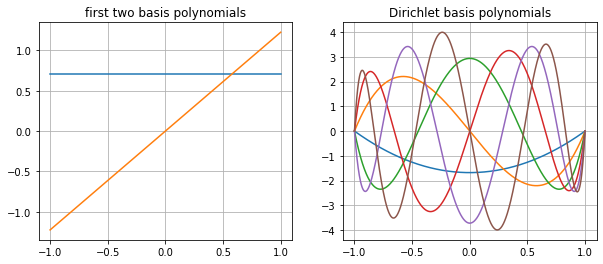

In [31]:
# Construct a Dirichlet basis for Jacobi polynomials
# This is effectively P_n - P_{n-2}, n = 2,3,...,Nmax,
# up to scaling to accomodate actual boundary values.
# This places boundary conditions in the first two rows
Lmax, a, b = 8, 0, 0
neta = 1000
z = np.linspace(-1,1,neta)
Pn = Jacobi.polynomials(Lmax,a,b,z).T
bc = Jacobi.polynomials(Lmax,a,b,1)

Qn_desired = bc[:-2] * Pn[:,2:] - bc[2:] * Pn[:,:-2]

S = sparse.diags([np.concatenate(([1,1],bc[:-2])), -bc[2:]], [0, 2])
Qn = Pn @ S
assert np.max(abs(Qn[:,2:]-Qn_desired)) < 1e-16

u = (1-np.arange(Lmax)/Lmax)**2
v = np.linalg.solve(S.todense(), u)
assert np.max(abs(Pn @ u - Qn @ v)) < 2e-15
assert np.max(abs(u - S @ v)) < 1e-15

fig, plot_axes = plt.subplots(1,2,figsize=(10,4))
plot_axes[0].plot(z,Qn[:,:2])
plot_axes[1].plot(z,Qn[:,2:])
plot_axes[0].set_title('first two basis polynomials')
plot_axes[1].set_title('Dirichlet basis polynomials')
plot_axes[0].grid()
plot_axes[1].grid()

print(D(+1)(5,0,3).todense())
print((A(+1)@B(+1))(5,0,3).todense())

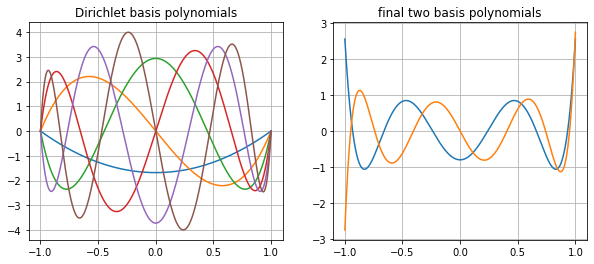

In [17]:
# Construct another Dirichlet basis for Jacobi polynomials
# This is effectively P_{n+2} - P_n, n = 0,1,...,Nmax-2
# up to scaling to accomodate actual boundary values.
# This places boundary conditions in the last two rows
Lmax, a, b = 8, 0, 0
neta = 1000
z = np.linspace(-1,1,neta)
Pn = Jacobi.polynomials(Lmax,a,b,z).T
bc = Jacobi.polynomials(Lmax,a,b,1)

S = sparse.diags([np.concatenate((-bc[2:],[1,1])), bc[:-2]], [0, -2])
Qn = Pn @ S
assert np.max(abs(Qn[ 0,:-2])) < 8e-15
assert np.max(abs(Qn[-1,:-2])) < 8e-15

u = (1-np.arange(Lmax)/Lmax)**2
v = np.linalg.solve(S.todense(), u)
assert np.max(abs(Pn @ u - Qn @ v)) < 4e-15
assert np.max(abs(u - S @ v)) < 1e-15

fig, plot_axes = plt.subplots(1,2,figsize=(10,4))
plot_axes[0].plot(z,Qn[:,:-2])
plot_axes[1].plot(z,Qn[:,-2:])
plot_axes[0].set_title('Dirichlet basis polynomials')
plot_axes[1].set_title('final two basis polynomials')
plot_axes[0].grid()
plot_axes[1].grid()
